In [ ]:
import xarray as xr

var = 'TSUP_H'

ds = xr.open_dataset(f'data-combined/QUOT_SIM2_var_{var}.nc', engine='netcdf4')
ds

In [ ]:
import pandas as pd
ds['time'] = pd.to_datetime(ds['time'], format='%Y%m%d')

In [ ]:
ds['time']

In [ ]:
ds.mean(['x','y'])

In [ ]:
import matplotlib.pyplot as plt 
ds['time'].mean(['x','y']).plot()

In [ ]:
import xclim as xc

#full_years = pd.date_range(ds.time.to_index()[0], ds.time.to_index()[-1], freq="D")
#ds = ds.reindex(time=full_years)

ds[var].attrs['units'] = 'degC'

#ds['time'] = pd.DatetimeIndex(ds['time'].values, freq='D')
#ds['date'] = pd.date_range(start='1958-08-01', end='2025-12-01')
ds_tx_days = xc.indicators.atmos.tx_days_above(tasmax=ds[var], thresh='35.0 degC', freq='YS', op='>')

In [ ]:
ds_tx_days.isel(time=45).plot()

In [ ]:
ds_tx_days.mean(['x','y']).plot()

In [ ]:
ds_tx_days.to_netcdf('data-results/TX35.nc', format='NETCDF4')

In [1]:
import xarray as xr

var = 'HI'

ds = xr.open_dataset(f'data-results/{var}.nc', engine='netcdf4')
ds

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 24595, y: 134, x: 142)
Coordinates:
  * time     (time) datetime64[ns] 197kB 1958-08-01 1958-08-02 ... 2025-12-01
  * y        (y) int64 1kB 16170 16250 16330 16410 ... 26570 26650 26730 26810
  * x        (x) int64 1kB 600 760 840 920 1000 ... 11720 11800 11880 11960
Data variables:
    HI       (time, y, x) float64 4GB ...

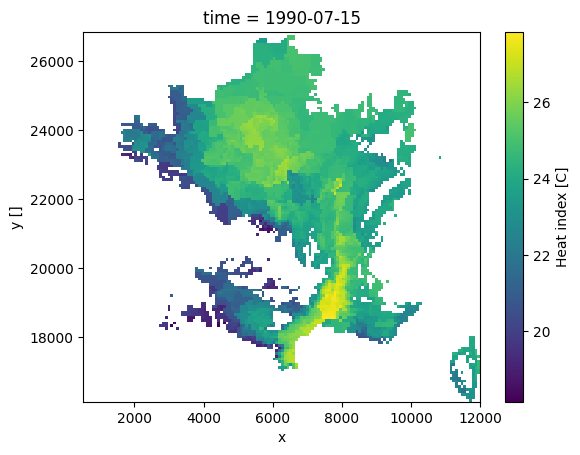

In [2]:
ds['HI'].sel(time='1990-07-15').plot()

In [ ]:
annual_mean = ds.groupby('time.year').mean(dim='time')

In [28]:
import pandas as pd
annual_mean['year'] = pd.to_datetime(annual_mean['year'], format='%Y')

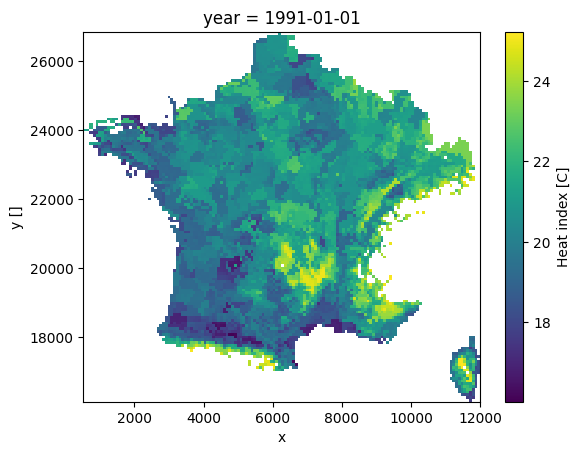

In [24]:
annual_mean['HI'].sel(year='1991').plot()

In [ ]:
annual_mean.to_netcdf('data-results/HI_mean_yr.nc', format='NETCDF4')